<h1 id="data_acquisition">Data Acquisition</h1>
<p>
Dataset: CaliforniaHousing from scikit.

<ul>
    <li>Data source: </a></li>
    <li>Data type: </li>
  
  <ul> 
    <li>  housingMedianAge: Median age of a house within a block. Lower number is a newer buildind. </li>
    <li>  totalRooms: continuous. </li>
    <li>  totalBedrooms: continuous. </li>
    <li>  population: continuous. </li>
    <li>  households: continuous. </li>
    <li>  medianIncome: continuous. </li>
    <li>  medianHouseValue: continuous and TARGET</li>
    <li>  GeoData_ California</li>
        <ul> 
          <li>  longitude: continuous.</li>
          <li>  latitude: continuous. </li>
        </ul> 
  </ul>
</ul>
</p>


<h2>Table of Contents</h2>

<ul>
    <li><a href="#Load_dataset_once">Load data from fetch_california_housing</a></li>
    <li><a href="#describe_dataset">Describe columns statistical values</a></li>
       <ul>
        <li><a href="#data_standardization">Data standardization</a></li>
        <li><a href="#data_normalization">Data normalization (centering/scaling)</a></li>
       </ul>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
    <li><a href="#anova">ANOVA</a></li>

</ul>  


In [2]:
from sklearn.datasets import fetch_california_housing

<h3 id="Load_dataset_once">Load  dataset </h3>

##### Scikit_learn  `fetch_california_housing()` return a **sklearn.utils._bunch.Bunch** object . #####
<p> 
 We need to convert Bunch in pandas dataframe.   
   
I used DataWrangler extension to find missing or duplicate values, and some others data like % of unique values.
 </p>

In [1]:
import pandas as pd

In [3]:
X = fetch_california_housing(as_frame=True )
#convert to pandas dataframe
df_house= X.frame

In [4]:
print ("DataType from scikit: ", type (X), "DataType pd_house_price: " , type(df_house))

DataType from scikit:  <class 'sklearn.utils._bunch.Bunch'> DataType pd_house_price:  <class 'pandas.core.frame.DataFrame'>


In [5]:
# to see data wrangler extension
df_house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#save to csv to load faster the dataset
df_house.to_csv("data_housing.csv")

#### The upper code is executed once ####
___

<h3 id="describe_dataset">Describe dataset by columns</h3>
There is not missing data or duplicate values into the CaliforniaHousing dataset.
#Load_dataset_once


In [2]:
#Read  csv to load  dataset
df_house= pd.read_csv("data_housing.csv")

In [3]:
#columns header
df_house.columns

Index(['ind', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [4]:
# describe all the columns in  
df_house.describe()

,ind,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,5958.399114,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.000000,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,5159.750000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,10319.500000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,15479.250000,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,20639.000000,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<h2 id="data_standardization">Data Standardization</h2>
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
Since the dataset was load from sklearn library, all the variables are standardize
</p>

<h2 id="data_normalization">Data Normalization</h2>

<p>Normalization is the process of transforming data 
</p>


<h2 id="pattern_visualization">Data Visualization</h2>
<b>Using seaborn library</b>
<p> It is important to understand what type of variables are in the dataset to find the right visualization method. In the California housing dataset, all Variables are Continuous Numerical and it can be visualized using "regplot" from Seaborn which plots the scatterplot plus the fitted regression line to the data. Regplot will be used to know the (linear) relationship between MedInc, HouseAge, AveRooms,	AveBedrms,	Population,	AveOccup and the target <b>MedHouseVal</b>
</p>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
sns.histplot(MedInc)


<p> Now, let's try Regplot from seaborn to know how strong or significative is the relationship between MedInc, HouseAge, AveRooms,	AveBedrms,	Population,	AveOccup and the target <b>MedHouseVal</b>
</p>

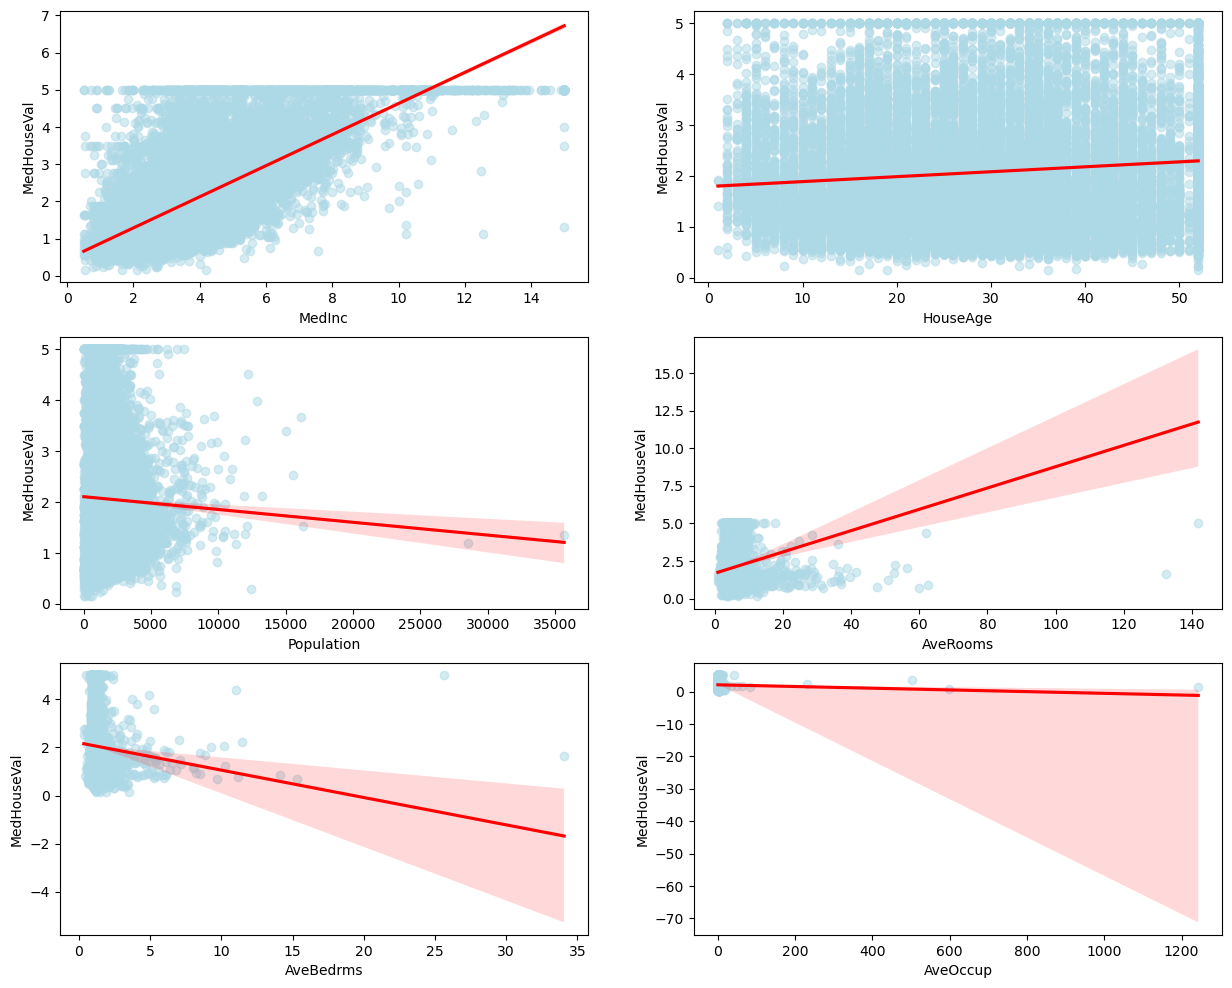

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(15,12))


sns.regplot(ax=ax[0,0], x="MedInc" , y="MedHouseVal", data=df_house, scatter_kws={"color" :"lightblue", "alpha" : 0.5},
                line_kws={"color" : "red"})

sns.regplot(ax=ax[0,1], x="HouseAge" , y="MedHouseVal", data=df_house, scatter_kws={"color" :"lightblue", "alpha" : 0.5},
                line_kws={"color" : "red"})
sns.regplot(ax=ax[1,0], x="Population" , y="MedHouseVal", data=df_house, scatter_kws={"color" :"lightblue", "alpha" : 0.5},
                line_kws={"color" : "red"})
sns.regplot(ax=ax[1,1], x="AveRooms" , y="MedHouseVal", data=df_house, scatter_kws={"color" :"lightblue", "alpha" : 0.5},
                line_kws={"color" : "red"})
sns.regplot(ax=ax[2,0], x="AveBedrms" , y="MedHouseVal", data=df_house, scatter_kws={"color" :"lightblue", "alpha" : 0.5},
                line_kws={"color" : "red"}) 
sns.regplot(ax=ax[2,1], x="AveOccup" , y="MedHouseVal", data=df_house, scatter_kws={"color" :"lightblue", "alpha" : 0.5},
                line_kws={"color" : "red"})

plt.show()

In [26]:
df_house.corr()

,ind,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
ind,1.000000,0.071673,-0.181132,0.042471,-0.011169,0.024880,0.005545,0.081062,-0.113254,0.072086
MedInc,0.071673,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.181132,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.042471,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.011169,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.024880,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.005545,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,0.081062,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.113254,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.072086,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


#### The relationship between MedInc and MedHouseVal is positive and strong: 0.688075 ####

To see how significatively is the calculated correlation, we need to obtain Pearson Value:

<b>P-value</b>
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

It's suitable for study a Regression lineal model. 


In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_house['MedInc'], df_house['MedHouseValue'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>